# Premier petit projet SKLEARN : Student Exam Performance

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Etape 1: EDA

### Chargement du dataset

In [2]:
data = pd.read_csv('StudentPerformanceFactors.csv')
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### Compréhension des distributions 

1. Hours_Studied

<Axes: xlabel='Hours_Studied', ylabel='Count'>

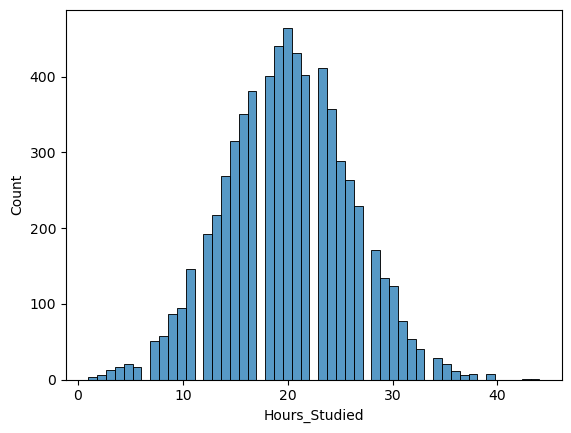

In [3]:
sns.histplot(data['Hours_Studied'])

2. Sleep_Hours

<Axes: xlabel='Sleep_Hours', ylabel='Count'>

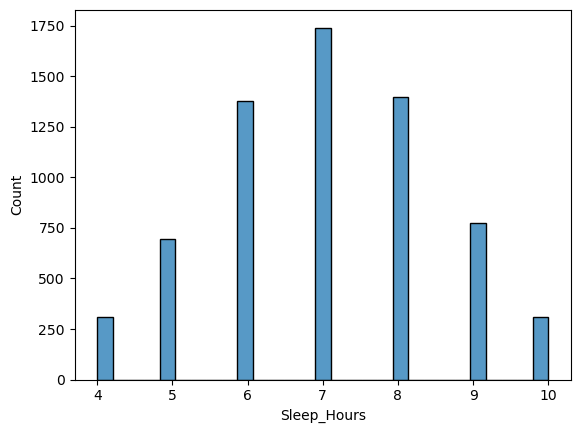

In [4]:
sns.histplot(data['Sleep_Hours'])

3. Exam_Score

<Axes: xlabel='Exam_Score', ylabel='Count'>

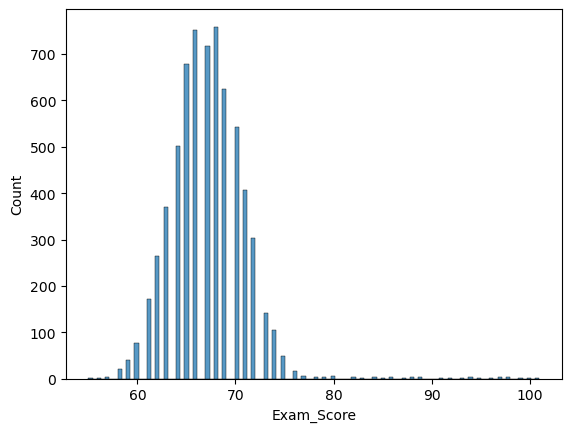

In [5]:
sns.histplot(data['Exam_Score'])

3. Previous_Score

<Axes: xlabel='Previous_Scores', ylabel='Count'>

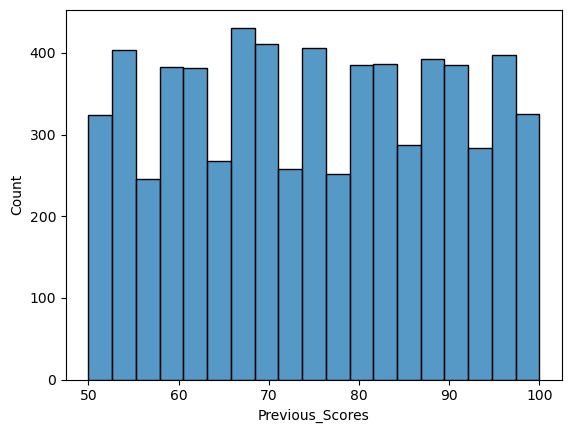

In [6]:
sns.histplot(data['Previous_Scores'])

4. Attendance

<Axes: xlabel='Attendance', ylabel='Count'>

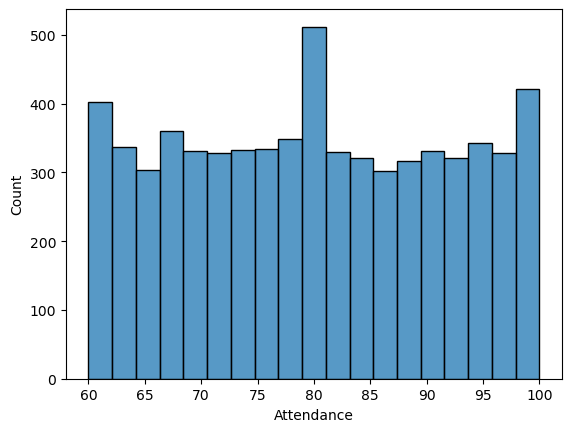

In [7]:
sns.histplot(data['Attendance'])

### Relations entre les variables continue et le score

1. Exam_Score et Hours_Studied

<Axes: xlabel='Exam_Score', ylabel='Hours_Studied'>

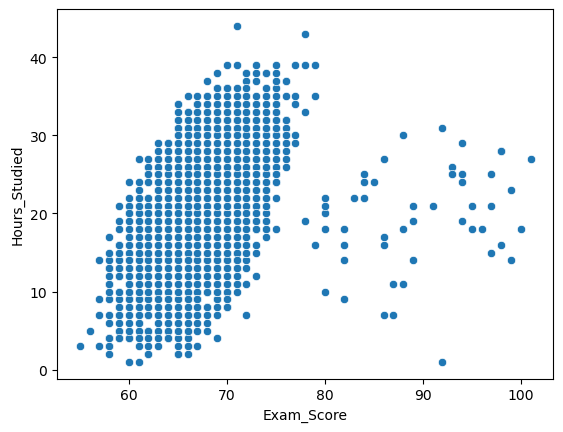

In [8]:
sns.scatterplot(x=data['Exam_Score'], y=data['Hours_Studied'], data=data)

2. Exam_Score et Sleep_Hours

<Axes: xlabel='Sleep_Hours', ylabel='Exam_Score'>

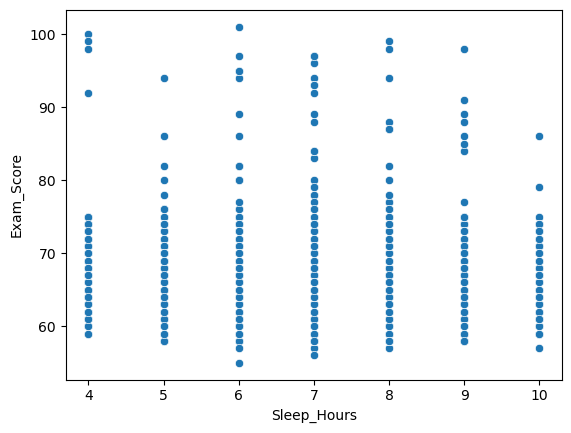

In [9]:
sns.scatterplot(y=data['Exam_Score'], x=data['Sleep_Hours'], data=data)

### Matrice de corrélation des valeurs numériques

In [10]:
# Savoir quels sont les colonnes avec des valeurs numériques
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [11]:
data_num = data[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']]

Matrice de corrélation

<Axes: >

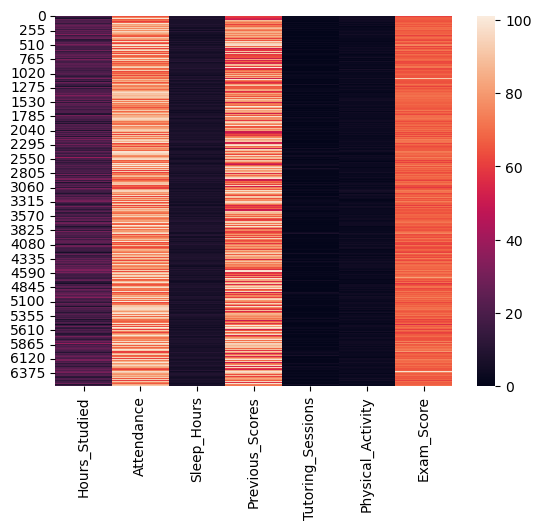

In [12]:
sns.heatmap(data_num)

## Etape 2: Préparation des données

#### Transformation des variables catégorielles 

In [13]:
data.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [14]:
def colone_par_type(df, data_type):
    return list(df.select_dtypes(include=[data_type]).columns)

In [15]:
col  = list(colone_par_type(data, 'object'))
x = 0
while x < len(col):
    data[col[x]] = data[col[x]].astype('category').cat.codes
    x = x+1

In [16]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


Standardisation des données + séparation des données

In [17]:
x = data.drop(['Exam_Score'], axis=1)
y = data['Exam_Score']

In [41]:
x_train ,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [42]:
# Normalisation des features
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

# Etape 3: Modélisation (Régression linéaire)

In [43]:
model = LinearRegression()
model.fit(x_train_scaler, y_train)
model.score(x_train_scaler, y_train)

0.652781126483742

Evaluation du modèle avec les métriques de régression

In [44]:
prediction = model.predict(x_test_scaler)

RMSE = round(np.sqrt(mean_squared_error(y_test, prediction)), 2)
r_2 = r2_score(y_test, prediction)

print(f" RMSE = {RMSE}")
print(f" R2 = {r_2}")

 RMSE = 2.29
 R2 = 0.6419010092726354


# Etape 4 : Interprétation

Observation des coefficients

In [45]:
model.coef_

array([ 1.73329003,  2.29121296, -0.38051727, -0.35634841,  0.25583543,
       -0.03963215,  0.68312742, -0.12935176,  0.25427433,  0.61379851,
       -0.11474087, -0.19035374,  0.00345991,  0.38712051,  0.16447005,
       -0.27046327,  0.08104125,  0.30870027, -0.01953612])

!!! On se rend compte que les valeurs qui influence le plus les prédictions sont :  **Hours_Studied, Attendance, Previous_Scores**

In [51]:
model.intercept_

np.float64(67.23292336802271)

# Etape 5 : Prédiction

In [62]:
def exam_score(etudiant):
    mapping = {
    'Parental_Involvement': {"Low":0, "Medium":1, "High":2}, 
    'Access_to_Resources' : {"Low":0, "Medium":1, "High":2}, 
    'Extracurricular_Activities': {"No":0, "Yes":1},
    'Motivation_Level' : {"Low":0, "Medium":1, "High":2},
    'Internet_Access' : {"No":0, "Yes":1},
    'Family_Income': {"Low":0, "Medium":1, "High":2},
    'Teacher_Quality': {"Low":0, "Medium":1, "High":2},
    'School_Type' : {"Public":0, "Private":1},
    'Peer_Influence': {"Negative":0, "Positive":1},
    'Learning_Disabilities': {"No":0, "Yes": 1},
    'Parental_Education_Level' : {"High School":0, "College":1, "Postgraduate":2},
    'Distance_from_Home': {"Near":0, "Moderate":1, "Far":2},
    'Gender': {"Male":0, "Female":1}}
    for col, mapping in mapping.items():
        etudiant[col] = etudiant[col].replace(mapping)
    data_scaler = scaler.transform(etudiant)
    return model.predict(data_scaler)

1er étudiant

In [68]:
etudiant_1 = {
    'Hours_Studied': 34, 
    'Attendance': 50,
    'Parental_Involvement': 'Low',
    'Access_to_Resources' : 'Low',
    'Extracurricular_Activities': 'No',
    'Sleep_Hours': 4,
    'Previous_Scores':67,
    'Motivation_Level' : 'High', 
    'Internet_Access': 'No',
    'Tutoring_Sessions': 2,
    'Family_Income': 'Low',
    'Teacher_Quality' : 'Medium',
    'School_Type' : 'Private',
    'Peer_Influence' : 'Positive', 
    'Physical_Activity' : 3,
    'Learning_Disabilities': 'No',
    'Parental_Education_Level': 'College',
    'Distance_from_Home': 'Far',
    'Gender': 'Female'
}
df_etudiant_1 = pd.DataFrame(etudiant_1, index=[0])

In [69]:
exam_score(df_etudiant_1)

C:\Users\Dylan TK\AppData\Local\Temp\ipykernel_656\1331317638.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  etudiant[col] = etudiant[col].replace(mapping)


array([65.46039823])

2ième étudiant

In [70]:
etudiant_2 = {
    'Hours_Studied': 10, 
    'Attendance': 90,
    'Parental_Involvement': 'High',
    'Access_to_Resources' : 'High',
    'Extracurricular_Activities': 'Yes',
    'Sleep_Hours': 8,
    'Previous_Scores':80,
    'Motivation_Level' : 'High', 
    'Internet_Access': 'Yes',
    'Tutoring_Sessions': 3,
    'Family_Income': 'High',
    'Teacher_Quality' : 'Medium',
    'School_Type' : 'Private',
    'Peer_Influence' : 'Positive', 
    'Physical_Activity' : 3,
    'Learning_Disabilities': 'No',
    'Parental_Education_Level': 'Postgraduate',
    'Distance_from_Home': 'Near',
    'Gender': 'Female'
}
df_etudiant_2 = pd.DataFrame(etudiant_2, index=[0])

In [71]:
exam_score(df_etudiant_2)

C:\Users\Dylan TK\AppData\Local\Temp\ipykernel_656\1331317638.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  etudiant[col] = etudiant[col].replace(mapping)


array([66.20984638])

In [72]:
etudiant_3 = {
    'Hours_Studied': 29, 
    'Attendance': 80,
    'Parental_Involvement': 'Medium',
    'Access_to_Resources' : 'High',
    'Extracurricular_Activities': 'Yes',
    'Sleep_Hours': 10,
    'Previous_Scores':98,
    'Motivation_Level' : 'High', 
    'Internet_Access': 'Yes',
    'Tutoring_Sessions': 3,
    'Family_Income': 'Medium',
    'Teacher_Quality' : 'High',
    'School_Type' : 'Public',
    'Peer_Influence' : 'Positive', 
    'Physical_Activity' : 3,
    'Learning_Disabilities': 'No',
    'Parental_Education_Level': 'Postgraduate',
    'Distance_from_Home': 'Near',
    'Gender': 'Male'
}
df_etudiant_3 = pd.DataFrame(etudiant_3, index=[0])

In [73]:
exam_score(df_etudiant_3)

C:\Users\Dylan TK\AppData\Local\Temp\ipykernel_656\1331317638.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  etudiant[col] = etudiant[col].replace(mapping)


array([70.9408291])